# MLOps exercises

## Execise 1

In this exercise, do the following:
1. Create a function that preprocess new ames data in the same way as the original ames data was preprocessed in step 5 in the `MLOps.ipynb` notebook.
2. Create a function that takes as input a new ames dataset and a model. The function should pre-process the new data and evaluate the model on that new data using mean absolute error.
3. Test the function from 2. on the "NewAmesData1.csv" dataset and the best model from the `MLOps.ipynb` notebook.
4. Test the function from 2. on the "NewAmesData2.csv" dataset and the best model from the `MLOps.ipynb` notebook. Do you see any drift?
5. Do you see a data drift in "NewAmesData2.csv"? If so, for which variables?
6. Do you see a data drift in "NewAmesData4.csv"? If so, for which variables?

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import pickle


In [2]:
def preprocess_ames_data(df):
    # One-hot encoding for categorical variables
    df = df.join(pd.get_dummies(df["Bldg Type"], drop_first=True, dtype="int", prefix="BType"))
    df = df.join(pd.get_dummies(df["Neighborhood"], drop_first=True, dtype="int", prefix="Nbh"))
    
    # Drop original categorical columns
    df = df.drop(columns=["Bldg Type", "Neighborhood"])
    
    # Split features and target variable
    X_processed = df.drop(columns=["SalePrice"])
    y_processed = df["SalePrice"]
    
    return X_processed, y_processed

2. Create a function that takes as input a new ames dataset and a model. The function should pre-process the new data and evaluate the model on that new data using mean absolute error.

In [3]:
def evaluate_model_on_new_data(model, new_data):
    # Preprocess the new data
    X_new, y_new = preprocess_ames_data(new_data)
    
    # Make predictions
    y_pred = model.predict(X_new)
    
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_new, y_pred)
    
    print(f"Model Evaluation - MAE: {mae:.2f}")




3. Test the function from 2. on the "NewAmesData1.csv" dataset and the best model from the `MLOps.ipynb` notebook.

In [33]:
new_ames_data_1 = pd.read_csv("data/NewAmesData1.csv")

with open("best_model.pkl", "rb") as file:
    best_model = pickle.load(file)

evaluate_model_on_new_data(best_model, new_ames_data_1)

Model Evaluation - MAE: 19211.57


4. Test the function from 2. on the "NewAmesData2.csv" dataset and the best model from the `MLOps.ipynb` notebook. Do you see any drift?

In [34]:
new_ames_data_2 = pd.read_csv("data/NewAmesData2.csv")

with open("best_model.pkl", "rb") as file:
    best_model = pickle.load(file)

evaluate_model_on_new_data(best_model, new_ames_data_2)

Model Evaluation - MAE: 122653.88


5. Do you see a data drift in "NewAmesData2.csv"? If so, for which variables?

In [ ]:

new_ames_data_1.describe()


None
None


,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,SalePrice
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,10077.269693,5.058745,1971.823765,1481.263017,5.870494,6.325768,2007.736983,181129.140187
std,5431.422205,1.226607,32.027285,491.585274,1.693980,2.853957,1.346011,84355.480982
min,1471.000000,1.000000,1865.000000,409.000000,2.000000,1.000000,2006.000000,12796.000000
25%,7590.000000,4.000000,1951.000000,1113.000000,5.000000,4.000000,2007.000000,128708.000000
50%,9421.000000,5.000000,1975.000000,1442.000000,6.000000,6.000000,2008.000000,159453.000000
75%,11599.000000,6.000000,1998.000000,1752.000000,7.000000,8.000000,2009.000000,211905.000000
max,70207.000000,9.000000,2022.000000,4669.000000,13.000000,12.000000,2010.000000,621346.000000


In [12]:
new_ames_data_2.describe()

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,SalePrice
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,10077.269693,5.058745,1971.823765,1481.263017,5.870494,6.325768,2007.736983,115736.106582
std,5431.422205,1.226607,32.027285,491.585274,1.693980,2.853957,1.346011,161832.682309
min,1471.000000,1.000000,1865.000000,409.000000,2.000000,1.000000,2006.000000,-80248.699200
25%,7590.000000,4.000000,1951.000000,1113.000000,5.000000,4.000000,2007.000000,7215.642000
50%,9421.000000,5.000000,1975.000000,1442.000000,6.000000,6.000000,2008.000000,35803.908800
75%,11599.000000,6.000000,1998.000000,1752.000000,7.000000,8.000000,2009.000000,208342.899600
max,70207.000000,9.000000,2022.000000,4669.000000,13.000000,12.000000,2010.000000,681099.718200


it seems like there is a difference in sales price, and that is why we have such large drift

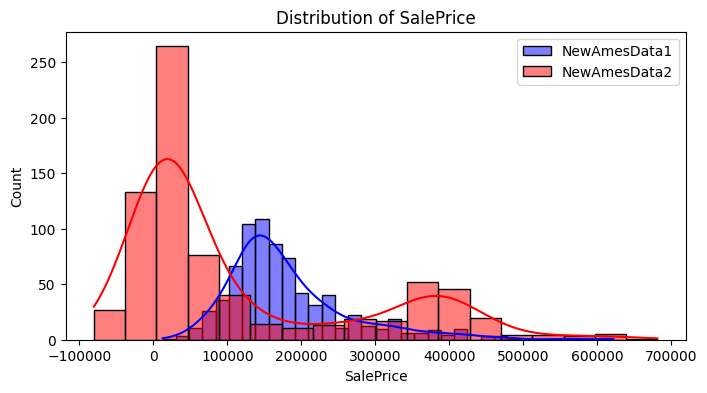

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ["SalePrice"]


plt.figure(figsize=(8,4))
sns.histplot(new_ames_data_1["SalePrice"], label="NewAmesData1", kde=True, color='blue')
sns.histplot(new_ames_data_2["SalePrice"], label="NewAmesData2", kde=True, color='red')
plt.legend()
plt.title(f"Distribution of {feature}")
plt.show()


6. Do you see a data drift in "NewAmesData4.csv"? If so, for which variables?

In [35]:
new_ames_data_4 = pd.read_csv("data/NewAmesData4.csv")

with open("best_model.pkl", "rb") as file:
    best_model = pickle.load(file)

evaluate_model_on_new_data(best_model, new_ames_data_4)

Model Evaluation - MAE: 28478.31


compared to the new_ames_housing_2 this has way less drift but sill some, lets check the features 

In [28]:
new_ames_data_1.describe()

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,SalePrice
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,10077.269693,5.058745,1971.823765,1481.263017,5.870494,6.325768,2007.736983,181129.140187
std,5431.422205,1.226607,32.027285,491.585274,1.693980,2.853957,1.346011,84355.480982
min,1471.000000,1.000000,1865.000000,409.000000,2.000000,1.000000,2006.000000,12796.000000
25%,7590.000000,4.000000,1951.000000,1113.000000,5.000000,4.000000,2007.000000,128708.000000
50%,9421.000000,5.000000,1975.000000,1442.000000,6.000000,6.000000,2008.000000,159453.000000
75%,11599.000000,6.000000,1998.000000,1752.000000,7.000000,8.000000,2009.000000,211905.000000
max,70207.000000,9.000000,2022.000000,4669.000000,13.000000,12.000000,2010.000000,621346.000000


In [17]:
new_ames_data_4.describe()

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,SalePrice
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,26365.512330,4.028494,1971.225916,1510.279512,5.958616,5.821574,2007.175712,184789.451832
std,6018.062238,1.254132,32.038755,513.992908,1.667646,2.785384,7.169914,85810.090650
min,17564.750457,-1.000000,1874.000000,409.000000,2.000000,0.000000,1994.000000,39778.000000
25%,23696.000457,3.000000,1950.000000,1115.250000,5.000000,4.000000,2001.000000,129552.500000
50%,25742.250457,4.000000,1975.000000,1454.000000,6.000000,6.000000,2007.000000,160956.500000
75%,27703.750457,5.000000,1999.000000,1763.500000,7.000000,8.000000,2013.000000,218240.500000
max,87361.750457,8.000000,2020.000000,5070.000000,15.000000,12.000000,2022.000000,753841.000000


comparing the numbers between New Ames 1 and 4 there is a large difference in the timespan, which would explain the data drift between these two, and why the numbers are different. 